In [1]:
import numpy as np
import pandas as pd
from pickle import dump

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Checking the data

checking the data to get an understanding of the data types and loading it into the pandas dataframe

In [3]:
df_hr = pd.read_csv('hour.csv')

In [4]:
df_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df_hr.info() #checking for dtypes of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
df_hr.isnull().sum() #checking for nan values

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df_hr.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Checking for correlation

Firstly I would like to check the correlations of the data with 'cnt' column

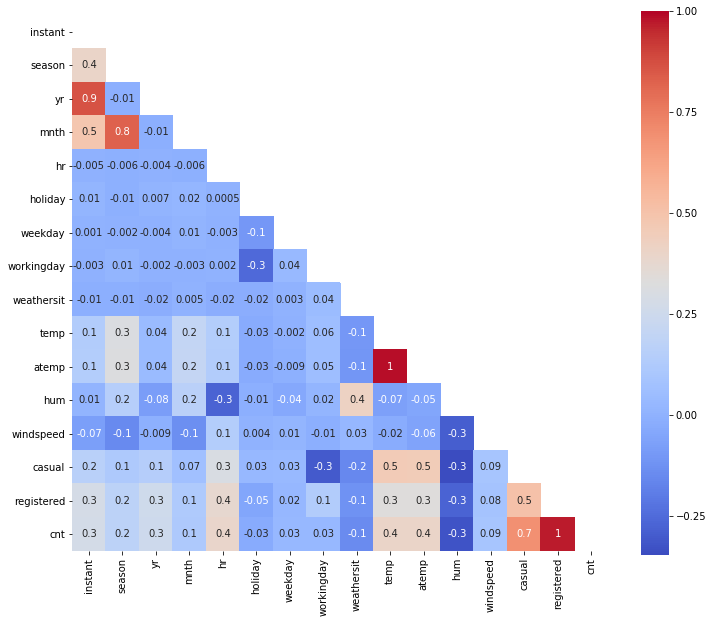

In [8]:
plt.figure(figsize = (12,10))
corr = df_hr.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] =True
sns.heatmap(corr, mask = mask, cmap = 'coolwarm', square = True, annot = True, fmt = '.1g')
# Correlation of the features

In [9]:
# Correlation of useful feature with respect to the demand
corr = df_hr.drop(columns=["instant", "dteday", "casual", "registered", "cnt", "yr"]).corrwith(df_hr.cnt)
corr

season        0.178056
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
dtype: float64

From the correlation I could derive that the temp and atemp are highly correlated and may present redundancy and even multicollinearity to avoid this we can drop atemp feature with each other and the humidity, weathersit, holiday gives negative correlations.

Also the hour of the day, temperature, and weathersit are strongly correlated to each other and as well as with the target column 'cnt'

# Visualizing the features affecting the count

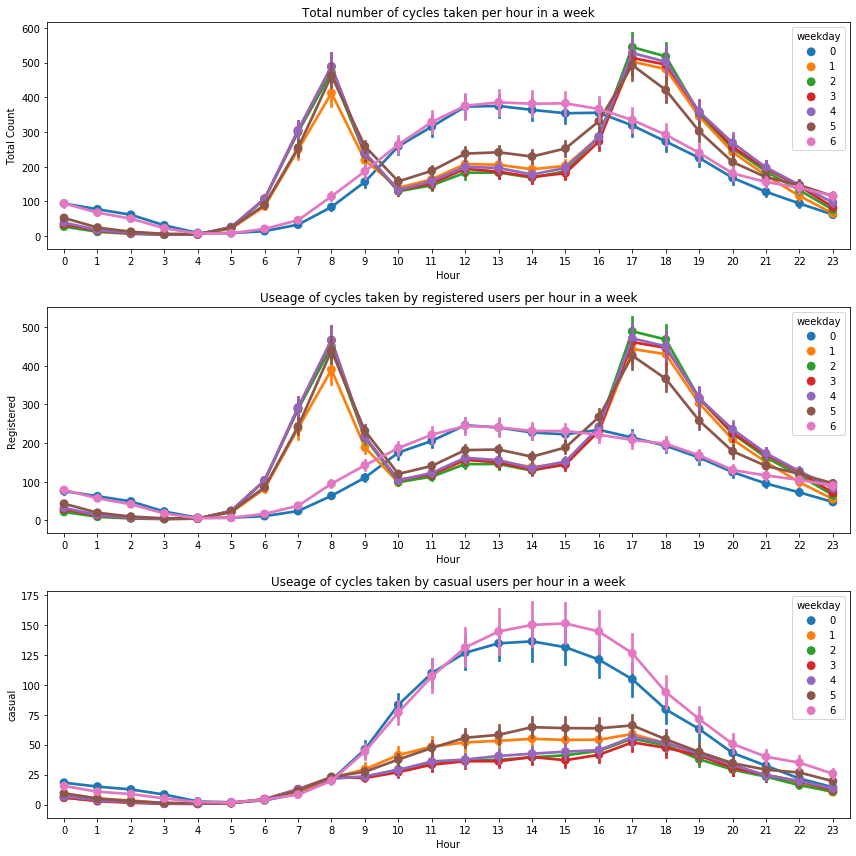

In [10]:
h = fig, axes = plt.subplots(3,1,figsize = (12,12))

sns.pointplot(x = 'hr', y = 'cnt', hue = 'weekday', data = df_hr, ax = axes[0])
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Total Count')
axes[0].set_title('Total number of cycles taken per hour in a week')

sns.pointplot(x = 'hr', y = 'registered', hue = 'weekday', data = df_hr, ax = axes[1])
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Registered')
axes[1].set_title('Useage of cycles taken by registered users per hour in a week')

sns.pointplot(x = 'hr', y = 'casual', hue = 'weekday', data = df_hr, ax = axes[2])
axes[2].set_xlabel('Hour')
axes[2].set_ylabel('casual')
axes[2].set_title('Useage of cycles taken by casual users per hour in a week')


plt.tight_layout()

We can see a trend here as registered users tend to rent the bikes during weekdays that is from 1 to 5 at a time period of 7:00 to 9:00 am maybe riding to work and in the evening at 17:00 to 19:00 aftr work riding to home. as for the casual users they tend to rent the bikes during weekends for leisure.

# Quantitative features vs Total rental counts

I created scatter plots of all float datatypes and compared them against rental counts to visualize potential relationship

Text(0.5, 1.0, 'Temperature "vs" Total count')

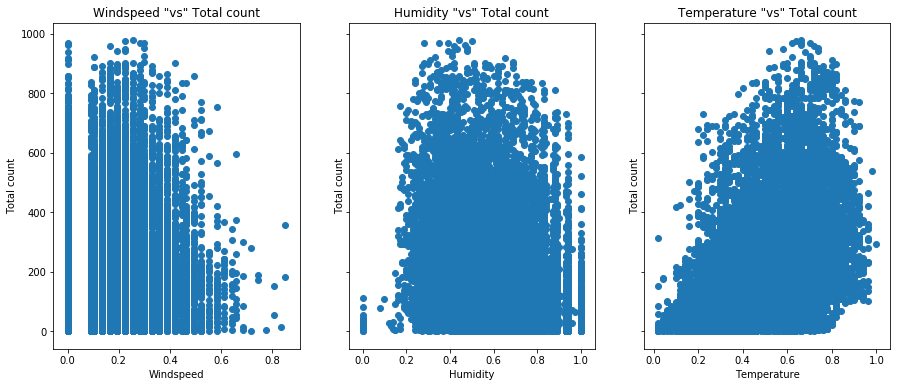

In [11]:
fig, ax = plt.subplots(1,3,figsize = (15,6), sharey= True)
ax[0].scatter(df_hr.windspeed, df_hr.cnt)
ax[0].set_xlabel('Windspeed')
ax[0].set_ylabel('Total count')
ax[0].set_title('Windspeed "vs" Total count')

ax[1].scatter(x= df_hr.hum, y = df_hr.cnt)
ax[1].set_xlabel('Humidity')
ax[1].set_ylabel('Total count')
ax[1].set_title('Humidity "vs" Total count')

ax[2].scatter(df_hr.temp, df_hr.cnt)
ax[2].set_xlabel('Temperature')
ax[2].set_ylabel('Total count')
ax[2].set_title('Temperature "vs" Total count')

As per the scatterplot we can see their is a linear relation between the temperature and the number of bikes rented as the warmer the temperature gets the more the bikes get rented

The humidity looks like a big blob throughout, excepth the edges where it shows some sparsensess. and the feature windspeed shows inverse relationship with rentals. We could say too much wind and the bike rentals dont seem to mix 

Text(0.5, 1.0, 'Mean count values hourly for each type of weather')

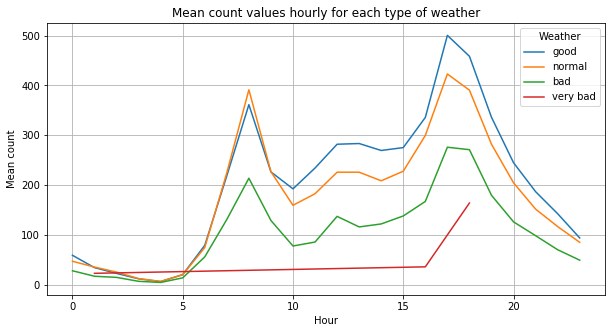

In [12]:
weather = df_hr.groupby(['weathersit','hr'])
weather_df_count = weather.size().to_frame(name='weather_df_count')
weather_df_count = (weather_df_count.join(weather.agg( {'cnt': 'mean'}).rename(columns={'cnt':'count_mean'})).reset_index())
plt.figure(figsize = (10,5))
for i in weather_df_count.groupby('weathersit').groups.keys():
    # 1-good, 2-normal, 3-bad, 4-very bad
    plt.plot(weather_df_count['hr'][weather_df_count.groupby('weathersit').groups[i]], weather_df_count['count_mean'][weather_df_count.groupby('weathersit').groups[i]])
plt.grid()
plt.xlabel('Hour')
plt.legend(title='Weather',labels=['good', 'normal', 'bad', 'very bad'])
plt.ylabel('Mean count')
plt.title('Mean count values hourly for each type of weather')

Text(0.5, 0.98, 'Mean casual and registered number of users hourly for each type of weather')

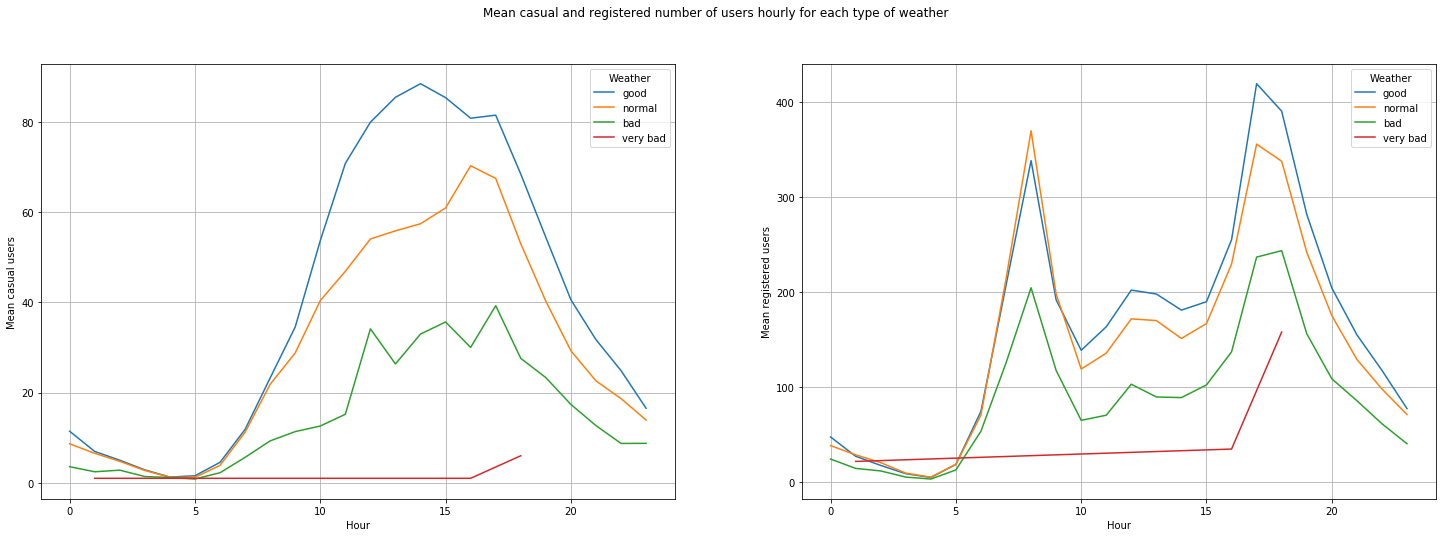

In [13]:
weather_df_casual = weather.size().to_frame(name = 'weather_df_casual')
weather_df_casual = (weather_df_casual.join(weather.agg({'casual':'mean'})).rename(columns = {'casual':'casual_mean'}).reset_index())

weather_df_registered = weather.size().to_frame(name = 'weather_df_registered')
weather_df_registered = weather_df_registered.join(weather.agg({'registered':'mean'})).rename(columns = {'registered':'registered_mean'}).reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2 , figsize = (25,8))

for i in weather_df_casual.groupby('weathersit').groups.keys():
    # 1-good, 2-normal, 3-bad, 4-very bad
    axes[0].plot(weather_df_casual.hr[weather_df_casual.groupby('weathersit').groups[i]], weather_df_casual.casual_mean[weather_df_casual.groupby('weathersit').groups[i]])
axes[0].grid()
axes[0].legend(title='Weather',labels=['good', 'normal', 'bad', 'very bad'])
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Mean casual users')    
    
for i in weather_df_registered.groupby('weathersit').groups.keys():
    axes[1].plot(weather_df_registered.hr[weather_df_registered.groupby('weathersit').groups[i]], weather_df_registered.registered_mean[weather_df_registered.groupby('weathersit').groups[i]])
    
axes[1].grid()
axes[1].legend(title='Weather',labels=['good', 'normal', 'bad', 'very bad'])
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Mean registered users')

plt.suptitle('Mean casual and registered number of users hourly for each type of weather', multialignment='center')

As we can see both casual and registered users prefer a good or normal weather to go for a ride

The weather is directly proportional to the count

Text(0, 0.5, 'Total count')

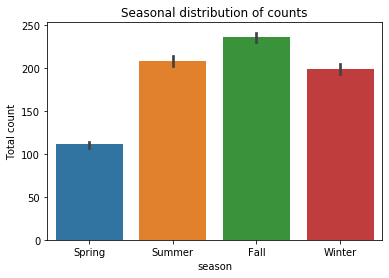

In [14]:
fig,ax = plt.subplots()
sns.barplot(data=df_hr, x='season', y='cnt', ax=ax)
ax.set(title="Seasonal distribution of counts")
ax.set_xticklabels(['Spring', 'Summer','Fall','Winter'])
ax.set_ylabel('Total count')

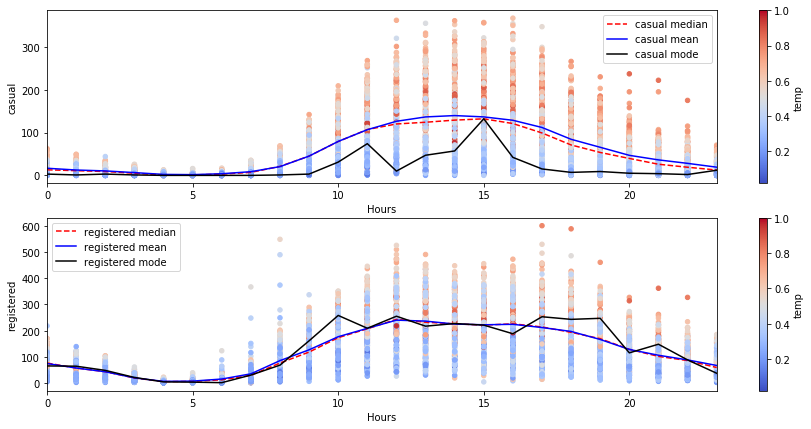

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False)
holiday = df_hr.query('workingday==0')

holiday.plot.scatter(x='hr', y='casual', c='temp', colormap='coolwarm', figsize=(15,7), ax=ax[0])
holiday.groupby(by='hr').casual.median().plot(ax=ax[0], style='--r')
holiday.groupby(by='hr').casual.mean().plot(ax=ax[0], style= '-b')
holiday.groupby(by='hr').casual.agg(lambda x:x.value_counts().index[0]).plot(ax=ax[0], style='-k')
ax[0].set_xlim((0,23))
ax[0].set_xlabel('Hours')
ax[0].legend(['casual median','casual mean', 'casual mode'])

holiday.plot.scatter(x='hr', y= 'registered', c='temp', cmap= 'coolwarm', figsize=(15,7), ax=ax[1])
holiday.groupby(by='hr').registered.median().plot(ax=ax[1], style= '--r')
holiday.groupby(by='hr').registered.mean().plot(ax= ax[1], style =  '-b')
holiday.groupby(by='hr').registered.agg(lambda x:x.value_counts().index[0]).plot(ax=ax[1], style="-k")
ax[1].set_xlabel('Hours')
ax[1].legend(['registered median', 'registered mean', 'registered mode'])

plt.show()

We can see the trend for non working days the demand by both casual and registered users is higher during mid day compared to working days

I also plotted mean, median  and mode to avoid outliers in the dataframe

Text(0.5, 0, 'Hours')

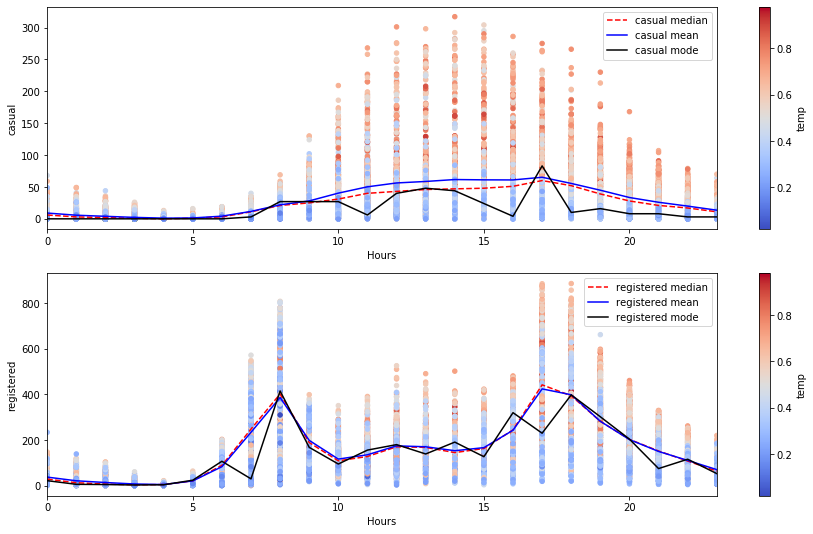

In [16]:
fig, ax = plt.subplots(nrows = 2, ncols=1, figsize = (15,9))
weekday = df_hr.query('holiday == 0 & weekday<6')

weekday.plot.scatter(x ='hr', y= 'casual', c = 'temp', cmap = 'coolwarm' , ax = ax[0])
weekday.groupby(by = 'hr').casual.median().plot(ax = ax[0], style = '--r')
weekday.groupby(by = 'hr').casual.mean().plot(ax = ax[0], style = '-b')
weekday.groupby(by ='hr').casual.agg(lambda x:x.value_counts().index[0]).plot(ax=ax[0], style='-k')
ax[0].legend(['casual median', 'casual mean', 'casual mode'])
ax[0].set_xlabel('Hours')

weekday.plot.scatter(x = 'hr', y='registered', c= 'temp', cmap ='coolwarm', ax = ax[1])
weekday.groupby(by = 'hr').registered.median().plot(ax = ax[1], style = '--r')
weekday.groupby(by = 'hr').registered.mean().plot(ax = ax[1], style = '-b')
weekday.groupby(by = 'hr').registered.agg(lambda x: x.value_counts().index[0]).plot(ax = ax[1], style = '-k')
ax[1].legend(['registered median','registered mean', 'registered mode'])
ax[1].set_xlabel('Hours')

During Weekdays. The median of the casual user demand is low, and the demand is increasing with temperature. As the mean and median are almost in the same line we could also say that there is no potential outlier in the data frame.

Text(0.5, 0.98, 'Registered and casual users trend during working and non working days due to weather')

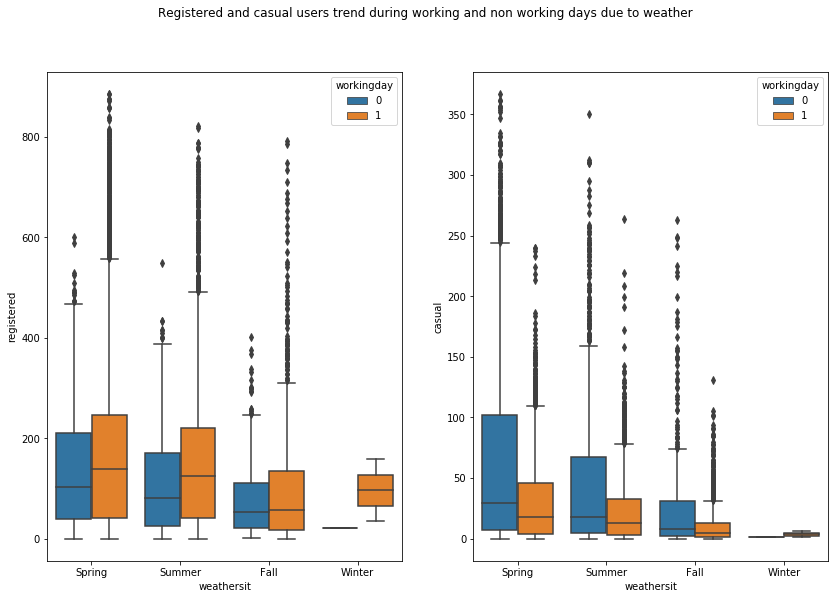

In [17]:
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize = (14, 9))

sns.boxplot(x = 'weathersit',y = 'registered', data = df_hr, hue = 'workingday', ax = ax[0])
ax[0].set_xticklabels(['Spring', 'Summer','Fall','Winter'])


sns.boxplot(x = 'weathersit', y = 'casual', data = df_hr, hue= 'workingday', ax = ax[1])
ax[1].set_xticklabels(['Spring', 'Summer','Fall','Winter'])

fig.suptitle('Registered and casual users trend during working and non working days due to weather')

we can observe that on working day we have higher demand rather than non working day even due to bad weather.

# Categorical variables to Dummy variables

There are some features such as weekdays in which we do not really want to use numbers, but we just simply want to derive wether or not a bicycle was used in a given day of that week. At the moment that is done by assigning the column weekday a value between 0 and 6. by changing it inot dummy variables.

In [18]:
def dummy_variables(df, data_col):
    dummy = pd.get_dummies(df[data_col], prefix = data_col)
    df = pd.concat([df, dummy], axis =1)
    return df

In [19]:
train_data = pd.DataFrame.copy(df_hr)

In [20]:
data_col = ['season', 'yr', 'mnth', 'hr', 'weekday', 'weathersit']

In [21]:
for data_col in data_col:
    train_data = dummy_variables(train_data, data_col)

In [22]:
train_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0


we have columns such as weekday although we have dummy columns, which is of no use so, removing this columns before training the model.

In [23]:
train_data.drop(['season', 'yr', 'mnth', 'hr', 'weekday', 'weathersit'],axis = 1, inplace = True)

In [24]:
train_data.head()

,instant,dteday,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,0,0,0.24,0.2879,0.81,0.0,3,13,...,0,0,0,0,0,1,1,0,0,0
1,2,2011-01-01,0,0,0.22,0.2727,0.80,0.0,8,32,...,0,0,0,0,0,1,1,0,0,0
2,3,2011-01-01,0,0,0.22,0.2727,0.80,0.0,5,27,...,0,0,0,0,0,1,1,0,0,0
3,4,2011-01-01,0,0,0.24,0.2879,0.75,0.0,3,10,...,0,0,0,0,0,1,1,0,0,0
4,5,2011-01-01,0,0,0.24,0.2879,0.75,0.0,0,1,...,0,0,0,0,0,1,1,0,0,0


In [25]:
train_data.drop(['instant','dteday'], axis = 1, inplace =True)

In [26]:
train_data.head()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,0.24,0.2879,0.81,0.0,3,13,16,1,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0.22,0.2727,0.80,0.0,8,32,40,1,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0.22,0.2727,0.80,0.0,5,27,32,1,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0.24,0.2879,0.75,0.0,3,10,13,1,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0.24,0.2879,0.75,0.0,0,1,1,1,...,0,0,0,0,0,1,1,0,0,0


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

Fitting the model for Registered Users

In [28]:
rfm_reg = RandomForestRegressor(n_estimators=1001, n_jobs=-1)

In [29]:
drop = ['casual','cnt']
label = ['registered']

In [30]:
# this will select all months of 0th year, and except 12th and 11th month of 1st year
train_registered = train_data.drop(columns = drop).query("~(yr_1==1 & mnth_11==1 &mnth_12==1)")
# 11th month of 1st year is considered in test set and 12th month of 1st year is discarded.
test_registered = train_data.drop(columns = drop).query("yr_1==1 & mnth_11==1")

In [31]:
rfm_reg.fit(X = train_registered.drop(columns=label), y= train_registered[label].values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1001,
                      n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [32]:
pred = rfm_reg.predict(X= test_registered.drop(columns = label))

In [33]:
print('Mean absolute Error :',mean_absolute_error(test_registered[label], pred))

Mean absolute Error : 11.57311340006326


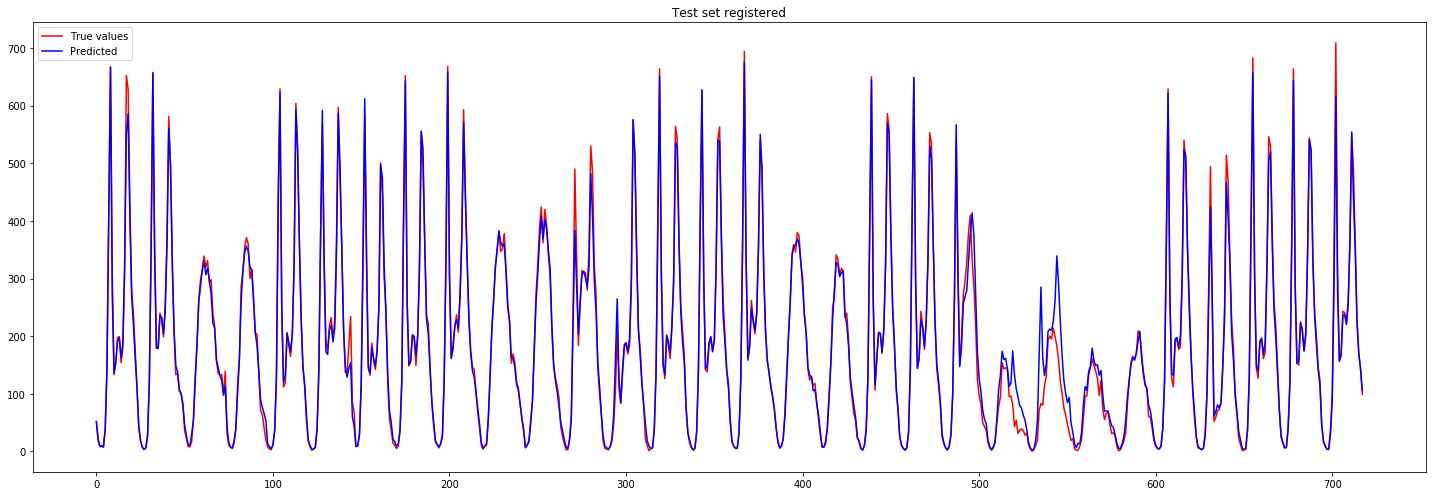

In [34]:
fig, ax = plt.subplots(1,1, figsize=(20,7), sharex=True)
ax.plot(test_registered[label].values,  "-r")
ax.plot(pred, "-b")
ax.legend(["True values", "Predicted"])
ax.set_title(f"Test set {label[0]}")

fig.tight_layout()

Fitting the model for Total count

In [35]:
rfm_cnt = RandomForestRegressor(n_estimators=1001, n_jobs=-1)

In [36]:
drop = ['registered','casual']
label = ['cnt']
train_cnt = train_data.drop(columns = drop).query("~(yr_1==1 & mnth_11==1 &mnth_12==1)")
test_cnt = train_data.drop(columns = drop).query("yr_1==1 & mnth_11==1")

In [37]:
rfm_cnt.fit(X = train_cnt.drop(columns=label), y= train_cnt[label].values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1001,
                      n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [38]:
predict_cnt = rfm_cnt.predict(X= test_cnt.drop(columns = label))

In [39]:
print('Mean absolute Error :',mean_absolute_error(test_cnt[label], predict_cnt))

Mean absolute Error : 14.333603677460625


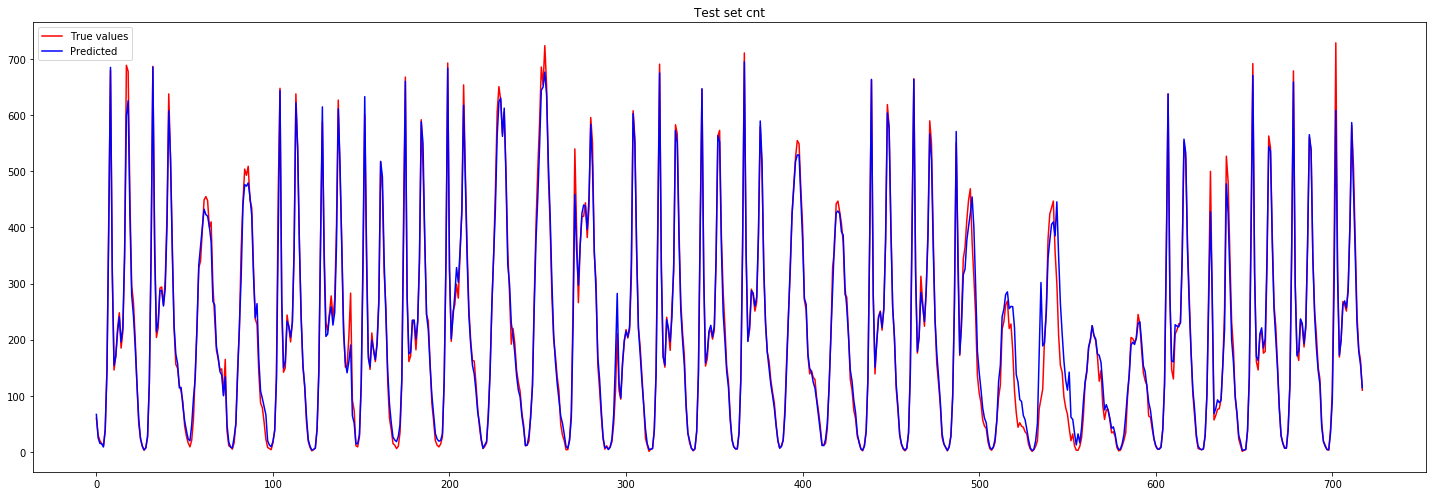

In [40]:
fig, ax = plt.subplots(1,1, figsize=(20,7), sharex=True)
ax.plot(test_cnt[label].values,  "-r")
ax.plot(predict_cnt, "-b")
ax.legend(["True values", "Predicted"])
ax.set_title(f"Test set {label[0]}")

fig.tight_layout()

Fitting model for casual users

In [41]:
rfm_cas = RandomForestRegressor(n_estimators=1001, n_jobs=-1)

In [42]:
drop = ['registered','cnt']
label = ['casual']
train_casual = train_data.drop(columns = drop).query("~(yr_1==1 & mnth_11==1 &mnth_12==1)")
test_casual = train_data.drop(columns = drop).query("yr_1==1 & mnth_11==1")

In [43]:
rfm_cas.fit(X = train_casual.drop(columns=label), y= train_casual[label].values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1001,
                      n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [44]:
predict_casual = rfm_cas.predict(X= test_casual.drop(columns = label))

In [45]:
print('Mean Absolute Error :',mean_absolute_error(test_casual[label], predict_casual))

Mean Absolute Error : 3.797999400784916


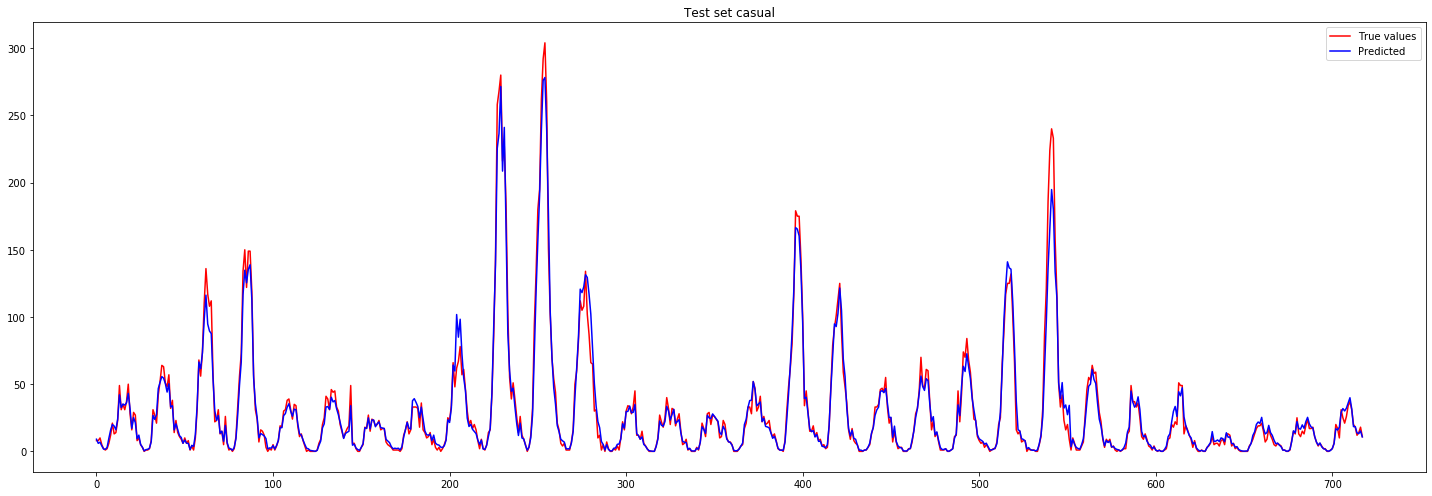

In [46]:
fig, ax = plt.subplots(1,1, figsize=(20,7), sharex=True)
ax.plot(test_casual[label].values,  "-r")
ax.plot(predict_casual, "-b")
ax.legend(["True values", "Predicted"])
ax.set_title(f"Test set {label[0]}")

fig.tight_layout()

In [47]:
#Saving models
dump(rfm_reg, open('rfm_reg', 'wb'))
dump(rfm_cnt, open('rfm_cnt', 'wb'))
dump(rfm_cas, open('rfm_cas', 'wb'))